In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
#configuration of the values
prices = np.linspace(15.0, 24.0, num=10, endpoint=True)

# discrete values of bids
bids = np.linspace(0.05, 2.0, num=10, endpoint=True)
#bids = np.array([0.03, 0.04, 0.07, 0.10, 0.18, 0.29, 0.47, 0.77, 1.20, 2.0])

clicks = [np.logspace(0.0, 200.0, num=10, endpoint=True),]
          #[0.17, 0.15, 0.14, 0.135, 0.12, 0.11, 0.08, 0.075, 0.07, 0.06],
          #[0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]


#customer categories
categories = ["C1", "C2", "C3"] 
#c1 - TRUE TRUE
#c2 - FALSE FALSE (NO ONLINE, NO SPESSO)
#c3 - TF FT
fractions = [0.25, 0.30, 0.45]

probabilities = [[0.25, 0.29, 0.30, 0.28, 0.25, 0.20, 0.16, 0.14, 0.145, 0.16],
                 [0.17, 0.15, 0.14, 0.135, 0.12, 0.11, 0.08, 0.075, 0.07, 0.06],
                 [0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]


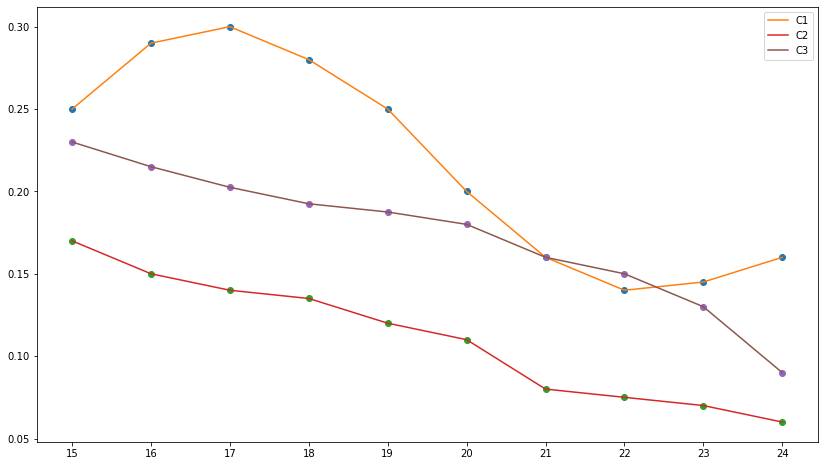

In [3]:
# CONVERSION RATES PLOTS
plt.figure(figsize=(14,8))
plt.xticks(prices)
for i in range(0,len(probabilities)):
    y = probabilities[i]
    x = prices
    f2 = interp1d(x, y, kind='cubic')
    
    plt.plot(x, y, 'o') ##
    plt.plot(x, f2(x), '-', label=categories[i])
    
plt.legend(loc='best')
plt.show()

In [4]:
np.average(probabilities, axis=0, weights=fractions)

array([0.217   , 0.21425 , 0.208125, 0.197125, 0.182875, 0.164   ,
       0.136   , 0.125   , 0.11575 , 0.0985  ])

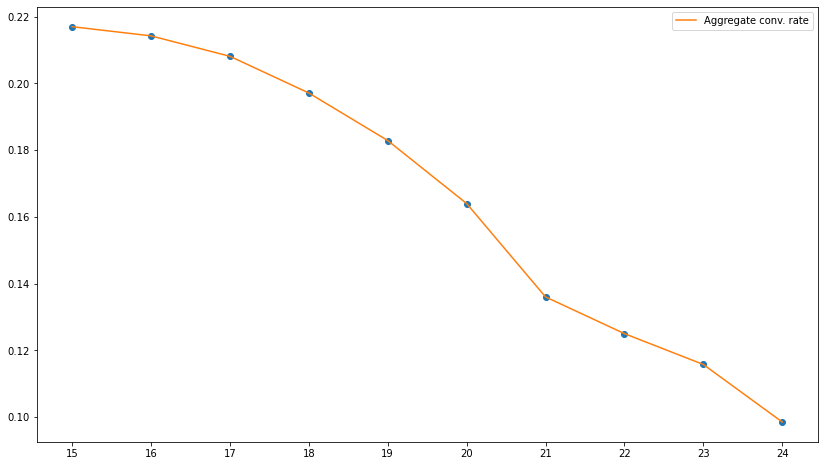

In [5]:
### aggregate conv rate curve
plt.figure(figsize=(14,8))
plt.xticks(prices)

y = np.average(probabilities, axis=0, weights=fractions)
x = prices
f2 = interp1d(x, y, kind='cubic')
    
plt.plot(x, y, 'o') ##
plt.plot(x, f2(x), '-', label='Aggregate conv. rate')
    
plt.legend(loc='best')
plt.show()

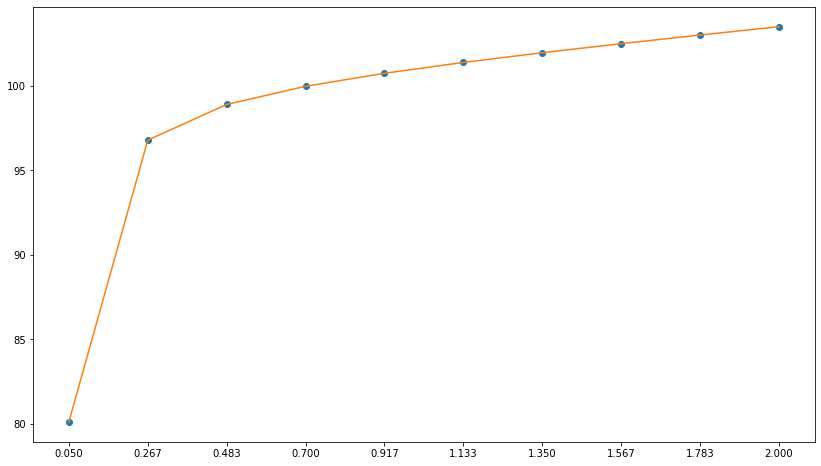

In [6]:
# discrete values of bids
bids = np.linspace(0.05, 2.0, num=10, endpoint=True)
#bids = np.array([0.03, 0.04, 0.07, 0.10, 0.18, 0.29, 0.47, 0.77, 1.20, 2.0])

#customer categories
#categories = ["C1", "C2", "C3"] 
#c1 - TRUE TRUE
#c2 - FALSE FALSE (NO ONLINE, NO SPESSO)
#c3 - TF FT

clicks = [np.logspace(0.0, 200.0, num=10, endpoint=True),]
          #[0.17, 0.15, 0.14, 0.135, 0.12, 0.11, 0.08, 0.075, 0.07, 0.06],
          #[0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]
        


plt.figure(figsize=(14,8))
plt.xticks(bids)


x = bids
y = (2*x**2-1)/x + 100
f2 = interp1d(x, y, kind='linear')
    

plt.plot(x, y, 'o') ##
plt.plot(x, f2(x), '-', label=categories[i])
plt.show()



In [7]:
y = (2*x**2-1)/x + 100
y

array([ 80.1       ,  96.78333333,  98.89770115,  99.97142857,
       100.74242424, 101.38431373, 101.95925926, 102.49503546,
       103.005919  , 103.5       ])

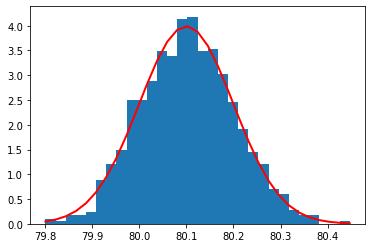

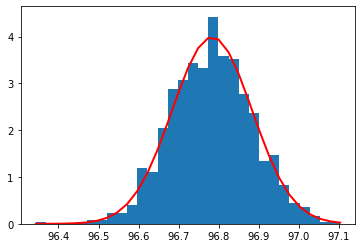

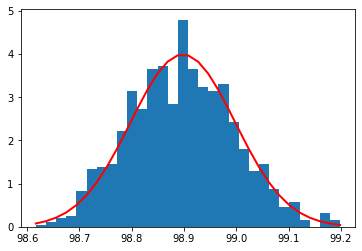

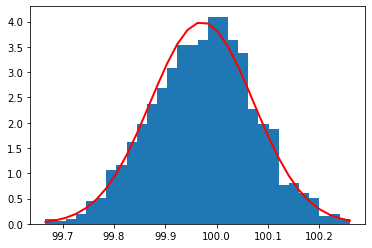

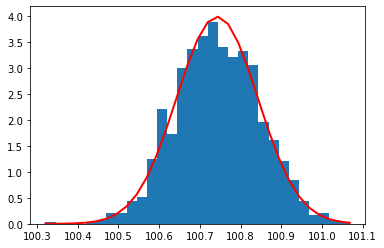

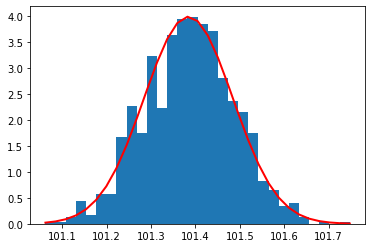

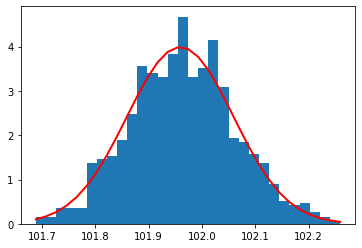

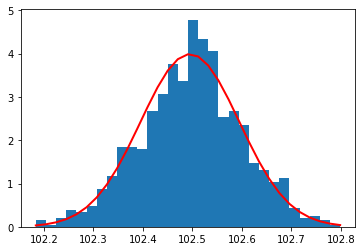

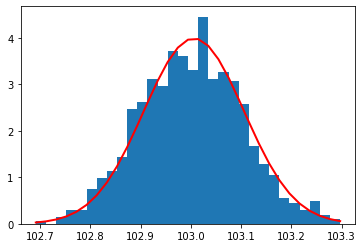

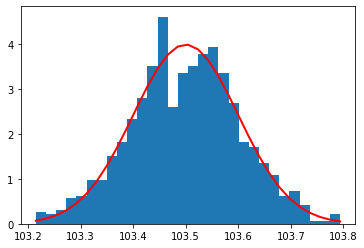

In [8]:

for i in range (0,len(y)):
    
    m=y[i]
    sigma=0.1
    gaussian=np.random.normal(m, sigma, 1000) #insert 1 to obtain only 1 sample
    
    count, bins, ignored = plt.hist(gaussian, 30, density=True) #plot sampled distribution
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                   np.exp( - (bins - m)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()


in_array :  [15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]

out_array_1 :  [0.24876369 0.24759762 0.24534202 0.2410069  0.2327774  0.21751542
 0.19039854 0.14569574 0.08037818 0.        ]

out_array_2 :  [0.16388469 0.15828863 0.14791048 0.12947101 0.0990731  0.05465717
 0.         0.         0.         0.        ]

out_array_3 :  [0.22994324 0.22984574 0.22958092 0.22886259 0.22692129 0.22172634
 0.2081841  0.17516666 0.10628695 0.        ]


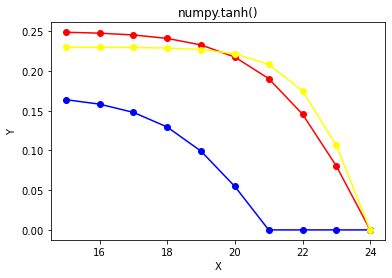

In [9]:
in_array = np.linspace(15.0, 24.0, num=10, endpoint=True)
    
coefficient_1= 0.25
x_offset_1=8
y_offset_1= 0
dilation_1= 3


coefficient_2= 0.17
x_offset_2=7
y_offset_2= 0
dilation_2= 3


coefficient_3= 0.23
x_offset_3=12
y_offset_3= 0
dilation_3= 2


out_array_1= coefficient_1 * np.tanh(x_offset_1- in_array / dilation_1) + y_offset_1

out_array_1=np.maximum(0,out_array_1)


out_array_2= coefficient_2 * np.tanh(x_offset_2- in_array / dilation_2) + y_offset_2

out_array_2=np.maximum(0,out_array_2)


out_array_3= coefficient_3 * np.tanh(x_offset_3- in_array / dilation_3) + y_offset_3

out_array_3=np.maximum(0,out_array_3)
  
print("in_array : ", in_array)
print("\nout_array_1 : ", out_array_1)
print("\nout_array_2 : ", out_array_2)
print("\nout_array_3 : ", out_array_3)
  
# red for numpy.tanh()
plt.plot(in_array, out_array_1, color = 'red', marker = "o")
plt.plot(in_array, out_array_2, color = 'blue', marker = "o")
plt.plot(in_array, out_array_3, color = 'yellow', marker = "o")
plt.title("numpy.tanh()")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()




in_array :  [15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]

out_array_1 :  [0.25405958 0.30463766 0.33931346 0.3620593  0.37655022 0.38561103
 0.39121045 0.39464572 0.39674389 0.3980219 ]

out_array_2 :  [0.2174879  0.25224347 0.2790234  0.29908729 0.31380581 0.32443688
 0.33202989 0.33740965 0.34119964 0.34385895]

out_array_3 :  [0.22847825 0.27154448 0.28920827 0.29598429 0.29851643 0.29945337
 0.29979879 0.29992596 0.29997276 0.29998998]


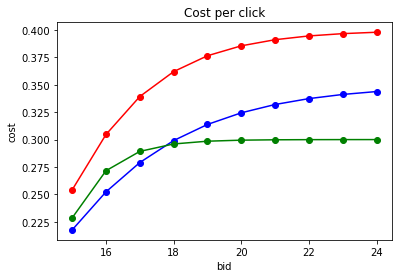

In [76]:
# Cost per click

in_array = np.linspace(15.0, 24.0, num=10, endpoint=True)
    
coefficient_1=0.4
x_offset_1=3
y_offset_1= 0
dilation_1= 4


coefficient_2= 0.35
x_offset_2=2
y_offset_2= 0
dilation_2= 5.5


coefficient_3= 0.3
x_offset_3=6.5
y_offset_3= 0
dilation_3= 2


out_array_1= coefficient_1 * np.tanh(-x_offset_1+in_array / dilation_1) + y_offset_1

out_array_1=np.maximum(0,out_array_1)


out_array_2= coefficient_2 * np.tanh(-x_offset_2 + in_array / dilation_2) + y_offset_2

out_array_2=np.maximum(0,out_array_2)


out_array_3= coefficient_3 * np.tanh(-x_offset_3 + in_array / dilation_3) + y_offset_3

out_array_3=np.maximum(0,out_array_3)
  
print("in_array : ", in_array)
print("\nout_array_1 : ", out_array_1)
print("\nout_array_2 : ", out_array_2)
print("\nout_array_3 : ", out_array_3)
  
# red for numpy.tanh()
plt.plot(in_array, out_array_1, color = 'red', marker = "o")
plt.plot(in_array, out_array_2, color = 'blue', marker = "o")
plt.plot(in_array, out_array_3, color = 'green', marker = "o")
plt.title("Cost per click") 
plt.xlabel("bid")
plt.ylabel("cost")
plt.show()



In [158]:
#example of stochasticity on cost per click

price=17

cost_per_click= coefficient_1 * np.tanh(-x_offset_1+ price / dilation_1) + y_offset_1

print("cost per click:" , cost_per_click)

noise=0.05

sample=np.random.normal(loc=cost_per_click,scale=noise,size=1)

print("stochastic cost per click:" , sample)





cost per click: 0.33931345598300516
stochastic cost per click: [0.31145989]


in_array :  [15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]

out_array_1 :  [4.  3.6 3.2 2.8 2.4 2.  1.6 1.5 1.5 1.5]

out_array_2 :  [2.  1.7 1.4 1.1 0.8 0.5 0.5 0.5 0.5 0.5]

out_array_3 :  [3.  2.6 2.2 1.8 1.4 1.  1.  1.  1.  1. ]


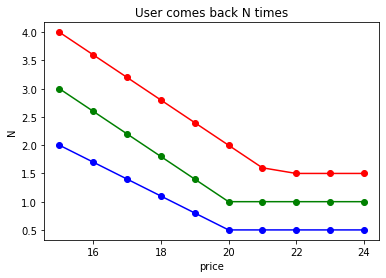

In [169]:
#Number of times user comes back
#ASSUMPTION: Dependancy on the price

coefficient_1 = 0.4
min_price_1 = 15
max_number_1 = 4
lower_bound_1= 1.5


coefficient_2 = 0.3
min_price_2 = 15
max_number_2 = 2
lower_bound_2= 0.5


coefficient_3 = 0.4
min_price_3 = 15
max_number_3 = 3
lower_bound_3=1

out_1= coefficient_1 * (-in_array + min_price_1) + max_number_1

out_1=np.maximum(lower_bound_1,out_1)


out_2= coefficient_2 * (-in_array + min_price_2) + max_number_2

out_2=np.maximum(lower_bound_2,out_2)


out_3= coefficient_3 * (-in_array + min_price_3) + max_number_3

out_3=np.maximum(lower_bound_3,out_3)


print("in_array : ", in_array)
print("\nout_array_1 : ", out_1)
print("\nout_array_2 : ", out_2)
print("\nout_array_3 : ", out_3)
  
# red for numpy.tanh()
plt.plot(in_array, out_1, color = 'red', marker = "o")
plt.plot(in_array, out_2, color = 'blue', marker = "o")
plt.plot(in_array, out_3, color = 'green', marker = "o")
plt.title("User comes back N times") 
plt.xlabel("price")
plt.ylabel("N")
plt.show()



In [211]:
#example of stochasticity on User coming back N times

price=18

n_times= coefficient_1 * (-price + min_price_1) + max_number_1

n_times=np.maximum(lower_bound_1,n_times)


print("User comes back N times:" , n_times)

noise=0.2

sample=np.random.normal(loc=n_times,scale=noise,size=1)

print("Stochastic user comes back N times :" , sample)

User comes back N times: 2.8
Stochastic user comes back N times : [2.76166095]
